Первичный импорт

In [ ]:
#Импорт необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from keras.layers import Dense, InputLayer

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from keras.metrics import Accuracy
import sklearn

In [ ]:
#Импортируем данные
df = pd.read_csv('/content/drive/MyDrive/Финашка/MLOps/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Предварительный анализ и очистка данных

In [ ]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<ipython-input-6-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

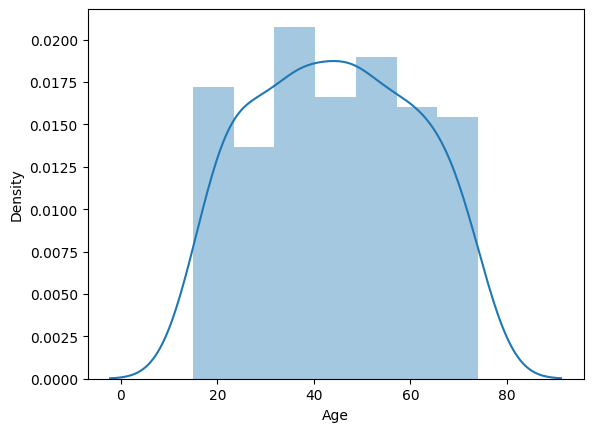

In [ ]:
sns.distplot(df.Age)

<ipython-input-7-fda53b94c691>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Na_to_K)


<Axes: xlabel='Na_to_K', ylabel='Density'>

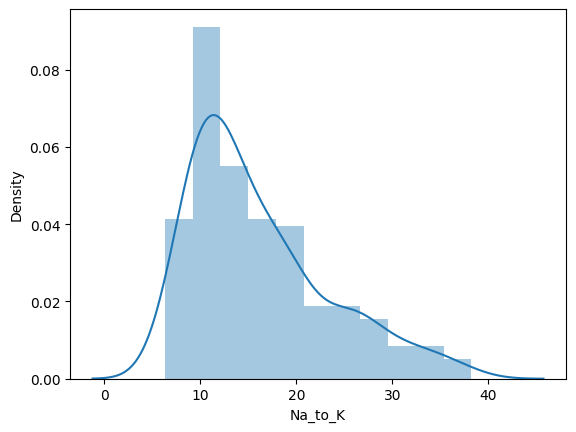

In [ ]:
sns.distplot(df.Na_to_K)

<ipython-input-8-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

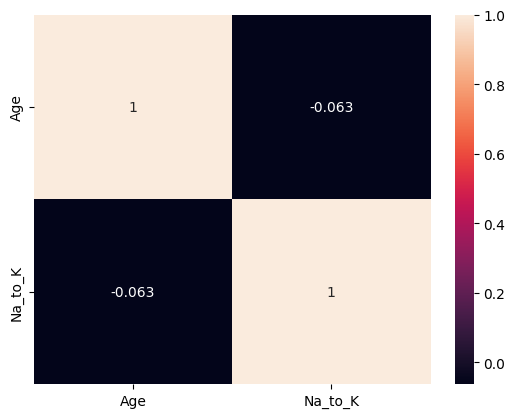

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Перевод категориальных признаков в числовые
df.Sex.unique()

array([1, 0])

In [ ]:
df.BP.unique()

array([1, 0, 2])

In [ ]:
df.Cholesterol.unique()

array([0, 1])

In [ ]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df.Sex = df.Sex.apply(lambda x: 1 if x == 'F' else 0)
df.Sex

0      1
1      0
2      0
3      1
4      1
      ..
195    1
196    0
197    0
198    0
199    1
Name: Sex, Length: 200, dtype: int64

In [ ]:
def replaceBP(x):
    if x == 'LOW':
        return 0
    elif x == 'HIGH':
        return 1
    else:
        return 2

df.BP = df.BP.apply(replaceBP)
df.BP

0      1
1      0
2      0
3      2
4      0
      ..
195    0
196    0
197    2
198    2
199    0
Name: BP, Length: 200, dtype: int64

In [ ]:
df.Cholesterol = df.Cholesterol.apply(lambda x: 0 if x == 'HIGH' else 1)
df.Cholesterol

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Cholesterol, Length: 200, dtype: int64

In [ ]:
df.Drug = df.Drug.apply(lambda x: 0 if x == 'DrugY' else 1 if x == 'drugC' \
                       else 2 if x == 'drugX' else 3 if x == 'drugA' else 4)
df.Drug

0      0
1      1
2      1
3      2
4      0
      ..
195    1
196    1
197    2
198    2
199    2
Name: Drug, Length: 200, dtype: int64

In [ ]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.480000,0.975000,0.485000,16.084485,1.285000
std,16.544315,0.500854,0.785788,0.501029,7.223956,1.353861
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,0.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,2.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [ ]:
y = df['Drug']
X = df.drop(['Drug'], axis = 1)
y

0      0
1      1
2      1
3      2
4      0
      ..
195    1
196    1
197    2
198    2
199    2
Name: Drug, Length: 200, dtype: int64

In [ ]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,1,0,25.355
1,47,0,0,0,13.093
2,47,0,0,0,10.114
3,28,1,2,0,7.798
4,61,1,0,0,18.043
...,...,...,...,...,...
195,56,1,0,0,11.567
196,16,0,0,0,12.006
197,52,0,2,0,9.894
198,23,0,2,1,14.020


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(40,)

Обучение моделей

In [ ]:
# Метод k ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.675

In [ ]:
# Случайный лес
RFC = RandomForestClassifier(n_estimators = 500, max_depth = 100)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
accuracy_score(y_test, y_pred)

0.975

In [ ]:
# Градиентный бустинг
GBC = GradientBoostingClassifier(n_estimators = 500, max_depth = 100)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
accuracy_score(y_test, y_pred)

0.95

In [ ]:
# Нейронная сеть с одним скрытым слоем
model = keras.Sequential()
model.add(InputLayer(input_shape = (5, )))
model.add(Dense(16, activation = 'ReLU'))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.summary()
model.fit(X_train, y_train, epochs = 100, batch_size = 20)
y_pred = model.predict(X_test)
y_pred.shape
pred = []
y_pred = list(y_pred)
for i in range(len(y_pred)):
    y_pred[i] = list(y_pred[i])
y_pred
for i in range(len(y_pred)):
    pred.append(y_pred[i].index(max(y_pred[i])))

len(pred)
pred = pd.DataFrame(pred)
accuracy_score(y_test, pred)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                96        
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 10ms/step - loss: 3.3661
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 3.3561
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 3.3187
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 3.2638
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 3.2474
Epoch 6/100
8/8 [===

0.2

In [ ]:
#Экспорт модели
import joblib
joblib.dump(RFC, 'model.pkl')

['model.pkl']